In [5]:
import pandas as pd

sedationLog = pd.read_csv('BMPMammalOnlyKeeperLog.csv')

sedationLog.head()

,Timestamp,Animal,Staff,Log Type,Date,Time,Feeding Log,Did you feed all individuals?,"If not, who did you feed?",What did you feed? (Weight per animal) [<0.1 lb],...,Did you sedate?,Vet Log,Type.2,Vet name,Type.3,Location,Notes.1,Reminders,Reminder Date,Reminder/Note
0,12/1/2024 10:43,Red Fox,Jake,Feeding/Observation,12/1/2024,10:30:00 AM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12/1/2024 10:45,Wolf,Jake,Habitat Cleaning/Observation,12/1/2024,10:00:00 AM,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12/1/2024 10:43,Bobcat,Jake,Feeding/Observation,12/1/2024,9:00:00 AM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11/30/2024 16:31,Bobcat,Jake,Feeding/Observation,11/30/2024,4:45:00 PM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11/30/2024 16:32,Red Fox,Jake,Feeding/Observation,11/30/2024,4:30:00 PM,NaN,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
sedationLog = sedationLog[sedationLog['Log Type'] == "Medical"]

In [9]:
sedation_cols = ['Timestamp','Animal','Staff','Log Type','Date','Time','Animal Name','Encounter Type','Sedation medication used','Which sedation kit was used?','Administration method','Dose','Time administered','Time to respond']

sedation_df = sedationLog[sedation_cols]

sedation_df = sedation_df[sedation_df['Encounter Type'] == 'Sedation']

sedation_df.head()

,Timestamp,Animal,Staff,Log Type,Date,Time,Animal Name,Encounter Type,Sedation medication used,Which sedation kit was used?,Administration method,Dose,Time administered,Time to respond
2503,12/8/2023 15:06,Red Fox,Krystal,Medical,12/8/2023,1:09:00 PM,Sabra,Sedation,BAM sedation,Fox,Hand,0.1 cc,1:32:00 PM,1:42:00 PM
2506,12/8/2023 14:57,Wolf,Krystal,Medical,12/8/2023,11:39:00 AM,Bodaway,Sedation,BAM Reversal,Fox,Hand,"2.4 cc Atipamezole, 0.5 cc Naltrexone",11:39:00 AM,11:45:00 AM
2509,12/8/2023 14:56,Wolf,Krystal,Medical,12/8/2023,10:58:00 AM,Bodaway,Sedation,BAM sedation,Fox,Dart gun,1.2 cc,10:58:00 AM,11:14:00 AM
2512,12/8/2023 15:07,Red Fox,Krystal,Medical,12/8/2023,1:58:00 AM,Sabra,Sedation,BAM Reversal,Fox,Hand,"0.2 cc Antipamezole, 0.5 cc Naltrexone",1:58:00 PM,2:03:00 PM
2835,10/27/2023 14:56,Wolf,Krystal,Medical,10/27/2023,12:12:00 PM,Ahuli,Sedation,BAM Reversal,Fox,Hand,"1 cc Naltrexone, 0.5 cc Atipamezole",12:12:00 PM,12:19:00 PM


In [11]:
sedation_df.isna().sum()

Timestamp                       0
Animal                          0
Staff                           0
Log Type                        0
Date                            0
Time                            0
Animal Name                     0
Encounter Type                  0
Sedation medication used        0
Which sedation kit was used?    0
Administration method           0
Dose                            0
Time administered               0
Time to respond                 0
dtype: int64

In [17]:
sedation_df['Time_taken'] = (pd.to_datetime(sedation_df['Time to respond'], format='%I:%M:%S %p') - pd.to_datetime(sedation_df['Time administered'], format='%I:%M:%S %p')).dt.total_seconds()/60

In [19]:
sedation_df[['Time administered','Time to respond','Time_taken']]

,Time administered,Time to respond,Time_taken
2503,1:32:00 PM,1:42:00 PM,10.0
2506,11:39:00 AM,11:45:00 AM,6.0
2509,10:58:00 AM,11:14:00 AM,16.0
2512,1:58:00 PM,2:03:00 PM,5.0
2835,12:12:00 PM,12:19:00 PM,7.0
2836,11:33:00 AM,11:43:00 AM,10.0
2839,11:11:00 AM,11:17:00 AM,6.0
2841,10:38:00 AM,10:48:00 AM,10.0
2842,9:47:00 AM,10:07:00 AM,20.0
3018,10:39:00 AM,10:45:00 AM,6.0


In [23]:
#sedation_df.to_csv('SedationLog.csv', index=False)

### Visualization of Sedation Log

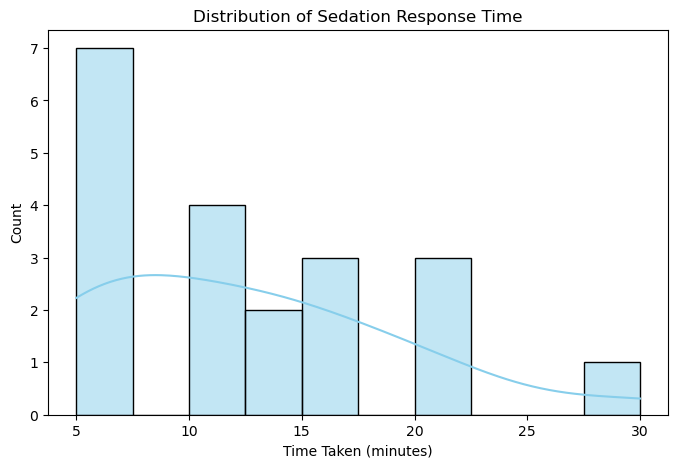

In [26]:
# Distribution of Sedation Time Taken

import matplotlib.pyplot as plt
import seaborn as sns

df = sedation_df.copy()

plt.figure(figsize=(8, 5))
sns.histplot(df["Time_taken"], bins=10, kde=True, color="skyblue")
plt.xlabel("Time Taken (minutes)")
plt.ylabel("Count")
plt.title("Distribution of Sedation Response Time")
plt.show()

C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_74064\664823295.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Sedation medication used", palette="pastel")


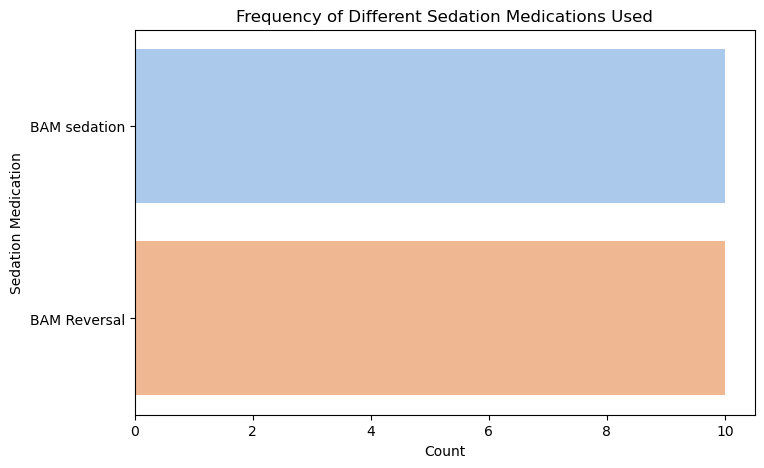

In [28]:
# Sedation Type Usage (Bar Chart)

plt.figure(figsize=(8, 5))
sns.countplot(data=df, y="Sedation medication used", palette="pastel")
plt.xlabel("Count")
plt.ylabel("Sedation Medication")
plt.title("Frequency of Different Sedation Medications Used")
plt.show()

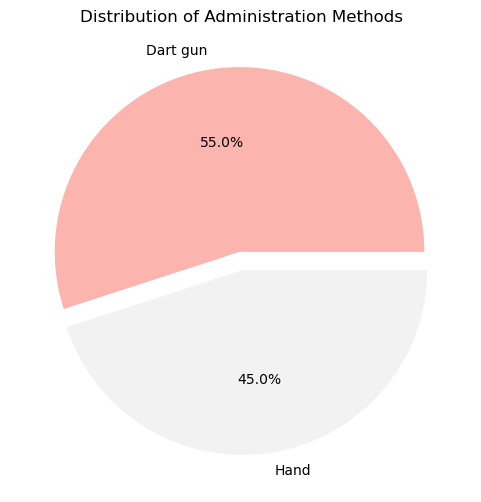

In [30]:
# Administration Method Breakdown

plt.figure(figsize=(6, 6))
df["Administration method"].value_counts().plot(kind="pie", autopct="%1.1f%%", cmap="Pastel1", explode=[0.05] * df["Administration method"].nunique())
plt.title("Distribution of Administration Methods")
plt.ylabel("")
plt.show()

C:\Users\Shauhardha\AppData\Local\Temp\ipykernel_74064\3059864151.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Animal", y="Time_taken", palette="Set3")


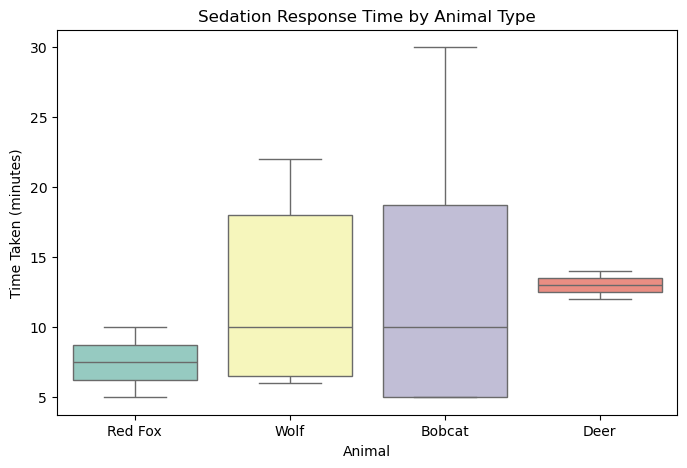

In [32]:
# Sedation Time Taken by Animal Type

plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="Animal", y="Time_taken", palette="Set3")
plt.xlabel("Animal")
plt.ylabel("Time Taken (minutes)")
plt.title("Sedation Response Time by Animal Type")
plt.show()

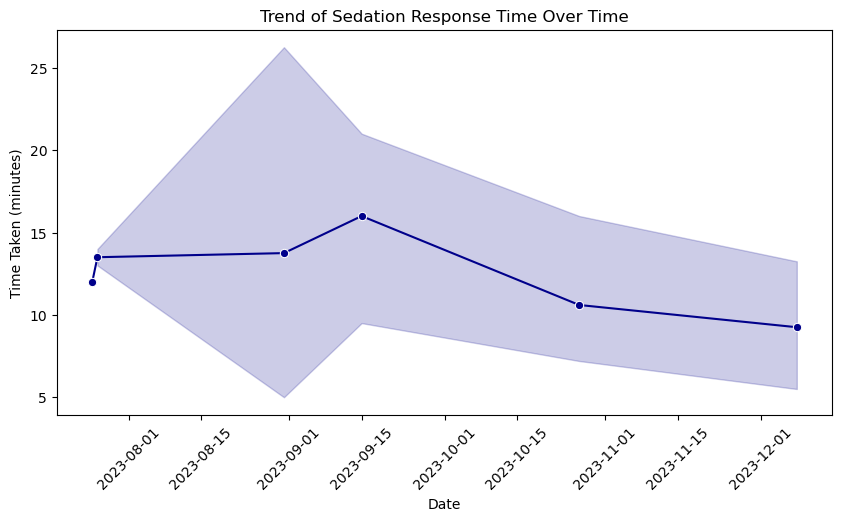

In [34]:
# Trends Over Time

df["Date"] = pd.to_datetime(df["Date"])  # Convert date column
df_sorted = df.sort_values("Date")  # Sort by date

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sorted, x="Date", y="Time_taken", marker="o", color="darkblue")
plt.xlabel("Date")
plt.ylabel("Time Taken (minutes)")
plt.title("Trend of Sedation Response Time Over Time")
plt.xticks(rotation=45)
plt.show()

#Not sure how I would utilize this visualization